# Análisis del Rendimiento Trimestral de Restaurantes en 2023

### Yosra Benjelloun El Hassani - 2 Abril 2024

Durante el proceso de preparar los datos para el análisis, en cada paso del código pondré comentarios que expliquen qué se está haciendo y por qué es importante para que sea fácil de entender y mantener.

## 1. Carga de Datos

In [1]:
# Importo librería 
import pandas as pd

# Cargo archivo excel
df = pd.read_excel('DIA_exam_restaurants_data_list.xlsx')

## 2. Inspección Inicial de los Datos

In [2]:
# Vistazo a las 10 primeras filas para tener una idea general de la estructura 
df.head(10)

,id,name,occupancy_2023QT1,occupancy_2023QT2,occupancy_2023QT3,occupancy_2023QT4,avgprice_2023QT1,avgprice_2023QT2,avgprice_2023QT3,avgprice_2023QT4
0,123,Taberna El Palomo,36.019478,32.918719,36.071398,32.671392,27.527947,26.311097,27.304771,25.006228
1,147,Columnas,NaN,59.164557,58.989036,55.283461,73.359119,NaN,80.469092,72.672362
2,173,CAFÉ DE INDIAS,38.546538,NaN,40.242649,39.057079,37.579845,40.065624,41.410608,38.886794
3,176,Horno San Buenaventura Asunción,63.973490,62.299179,57.834783,55.611819,NaN,NaN,13.610171,13.510172
4,181,Pelayo Bar de Tapas,24.718847,26.411141,28.003065,25.937675,53.177756,49.288056,48.162307,NaN
5,183,Buena Alameda Restaurante,12.935759,13.947675,13.372471,NaN,90.958010,88.884878,NaN,94.923688
6,193,Mesón Gallego,NaN,22.910482,20.827828,22.469884,NaN,90.749586,89.117871,86.334122
7,201,Bar restaurante Casa Manuela,57.460366,53.147822,51.023851,53.455102,60.853448,63.486676,64.372762,58.642230
8,212,Mar y Sal,23.647378,21.546661,21.764813,22.771787,91.054672,94.527467,NaN,NaN
9,214,Gastrobar Al-Andalus,45.875382,49.687507,48.226295,49.976774,81.439327,74.664680,67.256950,63.204858


In [3]:
# Vistazo a las 10 últimas filas
df.tail(10)

,id,name,occupancy_2023QT1,occupancy_2023QT2,occupancy_2023QT3,occupancy_2023QT4,avgprice_2023QT1,avgprice_2023QT2,avgprice_2023QT3,avgprice_2023QT4
8076,498201,Bar Vistabella - Casa Ale -,25.041276,24.375799,25.444286,25.443942,54.654050,59.437853,56.507687,57.368544
8077,498453,Sagasta,20.266573,21.572898,19.789208,20.476125,NaN,99.945197,100.000000,100.000000
8078,498454,La Buena Taza Sevilla,60.463693,60.580209,59.742478,62.628200,NaN,NaN,12.676331,13.608783
8079,498455,9 Musas Sevilla | Restaurante + Rooftop,30.240885,32.197113,32.172073,35.288405,86.523644,86.675340,NaN,88.311699
8080,498456,El limon,63.749527,59.620159,63.936278,NaN,23.905154,NaN,22.159449,23.100217
8081,498457,Braseria El Colibri,NaN,23.165964,23.132950,22.109405,18.647106,19.691928,NaN,NaN
8082,498458,Masakali Pizza La Encarnación,34.654684,36.021435,NaN,32.680966,100.000000,NaN,100.000000,100.000000
8083,498459,Patio San Eloy - Lagoh,15.483420,14.483368,15.103443,NaN,89.709832,95.497361,86.933589,85.463097
8084,498460,Restaurante Family,59.737472,61.266029,59.392640,59.435170,NaN,NaN,57.763004,NaN
8085,498461,La Mediterranea,70.000000,63.918772,62.425021,65.993816,NaN,62.908832,60.813595,55.771099


In [4]:
# Tamaño del conjunto de datos (filas, columnas)
df.shape

(8086, 10)

In [5]:
# Tipos de Datos y Valores Faltantes 
# para saber qué limpieza y transformación de datos hacer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8086 non-null   int64  
 1   name               8086 non-null   object 
 2   occupancy_2023QT1  7220 non-null   float64
 3   occupancy_2023QT2  7260 non-null   float64
 4   occupancy_2023QT3  7292 non-null   float64
 5   occupancy_2023QT4  7295 non-null   float64
 6   avgprice_2023QT1   6436 non-null   float64
 7   avgprice_2023QT2   6535 non-null   float64
 8   avgprice_2023QT3   6495 non-null   float64
 9   avgprice_2023QT4   6457 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 631.8+ KB


**Puntos clave sobre la estructura y calidad de los datos:**

- **8086 registros** (restaurantes), que se identifican por un rango de índices del 0 al 8085.
- **10 columnas**:
  - `id` es un identificador único para cada registro y no tiene valores faltantes.
  - El nombre de cada restaurante tampoco tiene valores faltantes.
  - La **ocupación en cada trimestre de 2023 tiene valores nulos**.
  - El **precio medio en cada trimestre de 2023 también tiene una cantidad considerable de valores nulos** (la información sobre el precio medio es aún más incompleta que la de la ocupación).

**Observaciones:**

- **Consistencia**: tendencia a tener más datos de ocupación disponibles en trimestres posteriores, lo que podría indicar una recopilación de datos en progreso o una mejora en la captura de datos a lo largo del tiempo.
- **Calidad**: la diferencia en la cantidad de valores nulos entre `occupancy` y `avgprice` puede indicar diferencias en la facilidad de recolección o en la prioridad dada a cada tipo de dato.
- **Preparación para Análisis**: para tratar los valores nulos decidiré entre sustituirlos o eliminarlos (con más tiempo sería interesante hacer un análisis para entender las razones de los datos faltantes y su impacto en los resultados del análisis).
- **Conversión de Tipos de Datos**: tipo de dato de las columnas numéricas correcto. Solo cambiaré la columna `id` para que no se use en cálculos numéricos y se trate como un identificador categórico.
- **Datos Categóricos**: `name` es de tipo `object`, correcto. Revisaré la consistencia (nombres duplicados o mal escritos).

In [6]:
# Convertir la columna "id" a categórica 
df['id'] = df['id'].astype('category')

# Revisar
print(df.dtypes)

id                   category
name                   object
occupancy_2023QT1     float64
occupancy_2023QT2     float64
occupancy_2023QT3     float64
occupancy_2023QT4     float64
avgprice_2023QT1      float64
avgprice_2023QT2      float64
avgprice_2023QT3      float64
avgprice_2023QT4      float64
dtype: object


In [7]:
# Descripción estadística de los datos numéricos (resumen tendencia central, dispersión y distribución)
# antes de limpiar los datos para hacerme una idea general
df.describe().T

,count,mean,std,min,25%,50%,75%,max
occupancy_2023QT1,7220.0,39.588893,17.330217,10.0,24.346967,39.480256,54.285048,70.0
occupancy_2023QT2,7260.0,39.583269,17.338812,10.0,24.462135,39.262846,54.325385,70.0
occupancy_2023QT3,7292.0,39.538741,17.424051,10.0,24.424625,39.110062,54.378748,70.0
occupancy_2023QT4,7295.0,39.420023,17.387247,10.0,24.291182,38.928968,53.980352,70.0
avgprice_2023QT1,6436.0,55.190782,25.844618,10.0,33.128698,55.030201,77.373882,100.0
avgprice_2023QT2,6535.0,55.095820,25.934647,10.0,32.957692,54.693110,77.672766,100.0
avgprice_2023QT3,6495.0,54.871837,25.960033,10.0,32.771975,54.474536,76.950748,100.0
avgprice_2023QT4,6457.0,54.936216,25.779085,10.0,33.247263,54.371970,76.718695,100.0


- **Ocupación**: **estable** a lo largo del año. Media de **39%**. 
- **Precios medios**: también son estables. Promedio alrededor de **55€**.
- Valores mínimos y máximos: se mantienen igual en todos los trimestres con un min. de 10 para ocupación y precio medio, y un max. de 70% en ocupación y 100€ en precio medio. Importantes para entender las dinámicas del mercado y la estrategia de precios.
- Destaco el **rango de precios medios que va desde 10 hasta 100€ indicando una gran variedad en la gama de precios de los restaurantes**.

## 3. Limpieza de Datos

### Valores Nulos

In [8]:
# Cantidad de valores nulos por columna
valores_nulos = df.isnull().sum()

# Porcentaje de valores nulos por columna
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

In [9]:
# Crear un DataFrame para mejorar visualización
resumen_nulos = pd.DataFrame({'cantidad_nulos': valores_nulos, 'porcentaje_nulos': porcentaje_nulos})

# Mostrar solo columnas con valores nulos
resumen_nulos = resumen_nulos[resumen_nulos['cantidad_nulos'] > 0]
resumen_nulos

,cantidad_nulos,porcentaje_nulos
occupancy_2023QT1,866,10.709869
occupancy_2023QT2,826,10.215187
occupancy_2023QT3,794,9.819441
occupancy_2023QT4,791,9.782340
avgprice_2023QT1,1650,20.405639
avgprice_2023QT2,1551,19.181301
avgprice_2023QT3,1591,19.675983
avgprice_2023QT4,1629,20.145931


Si los eliminara perdería entre el 10 y el 20% de la información. **Decido reemplazar los valores nulos con la mediana** de cada columna porque es menos sensible a valores extremos. Esto ayuda a evitar sesgos en el análisis y a mantener la representatividad de los resultados. 

In [10]:
# Reemplazar valores nulos con la mediana de cada columna
for column in df.columns:
    if df[column].isnull().any():
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

# Revisar 
print(df.isnull().sum())

id                   0
name                 0
occupancy_2023QT1    0
occupancy_2023QT2    0
occupancy_2023QT3    0
occupancy_2023QT4    0
avgprice_2023QT1     0
avgprice_2023QT2     0
avgprice_2023QT3     0
avgprice_2023QT4     0
dtype: int64


In [11]:
# Ver como afecta a la descripción estadística
df.describe().T

,count,mean,std,min,25%,50%,75%,max
occupancy_2023QT1,8086.0,39.577258,16.375834,10.0,26.162974,39.480256,52.565998,70.0
occupancy_2023QT2,8086.0,39.550537,16.429536,10.0,26.203883,39.262846,52.620431,70.0
occupancy_2023QT3,8086.0,39.496647,16.546859,10.0,26.158706,39.110062,52.666594,70.0
occupancy_2023QT4,8086.0,39.371986,16.515458,10.0,25.910621,38.928968,52.501975,70.0
avgprice_2023QT1,8086.0,55.158015,23.057175,10.0,38.922675,55.030201,71.539549,100.0
avgprice_2023QT2,8086.0,55.018575,23.315243,10.0,37.958855,54.693110,72.390312,100.0
avgprice_2023QT3,8086.0,54.793664,23.266517,10.0,38.320161,54.474536,71.539551,100.0
avgprice_2023QT4,8086.0,54.822543,23.037228,10.0,38.778291,54.371970,71.096870,100.0


No muestra cambios significativos, la sustitución no ha alterado la distribución de los datos.

### Duplicados

In [12]:
# Revisar si hay duplicados en la columna 'name'
duplicados = df['name'].duplicated().sum()
print(f'Hay {duplicados} nombres duplicados')

Hay 643 nombres duplicados


In [13]:
# Mirar si hay id que se repitan
duplicados_id = df['id'].duplicated().sum()
duplicados_id

0

In [14]:
# Encontrar los nombres duplicados
duplicados_names = df[df.duplicated('name', keep=False)].sort_values('name')

# Contar cuántas veces aparecen
name_dupli = duplicados_names['name'].value_counts()
name_dupli

Burger King                 31
McDonald's                  17
100 Montaditos              11
La Mar de Gambas             9
Foster's Hollywood           9
                            ..
Cerveceria Aki Te Espero     2
Cerrado                      2
Catalina La Barra            2
Catalina                     2
tapas                        2
Name: name, Length: 456, dtype: int64

Teniendo en cuenta que aparecen cadenas como BK, McDonald, Montaditos... y que cada uno tiene su "id" no haré nada con estos duplicados ya que en este contexto pueden ser válidos debido a que representan ubicaciones diferentes de una cadena.

In [15]:
# Duplicados en todo el df
duplicados_df = df[df.duplicated()]

# Número duplicados
numero_duplicados = len(duplicados_df)
print("Hay", numero_duplicados, "duplicados")

Hay 0 duplicados


### Formato

#### Homogeneizar los nombres de los restaurantes

In [16]:
def capitalizar_nombre(name):
    """
    Convierte la primera letra de cada palabra en mayúscula excepto para palabras específicas
    como 'y', 'de' y 'del', que se mantendrán en minúsculas a menos que sean la primera palabra.
    Además, se asegura de que las letras post-guion también sean mayúsculas.
    """
    # Palabras que no deben ir con mayúscula
    exceptions = ['y', 'de', 'del']
    # Dividir el nombre en palabras y capitalizar si no es una excepción
    name_parts = name.split()
    for i, part in enumerate(name_parts):
        if part.lower() in exceptions and i != 0:  # Si la palabra está en las excepciones y no es la primera palabra
            name_parts[i] = part.lower()
        else:
            # Capitalizar las palabras post-guion
            sub_parts = part.split('-')
            sub_parts = [sub_part.capitalize() if i == 0 or '-' in part else sub_part.lower()
                         for i, sub_part in enumerate(sub_parts)]
            name_parts[i] = '-'.join(sub_parts)

    # Reconstruir el nombre y devolver
    return ' '.join(name_parts)

In [17]:
# Aplicar la función a la columna 'name'
df['name'] = df['name'].apply(capitalizar_nombre)

# Revisar cambios
df['name'].head(10)

0                  Taberna El Palomo
1                           Columnas
2                     Café de Indias
3    Horno San Buenaventura Asunción
4                Pelayo Bar de Tapas
5          Buena Alameda Restaurante
6                      Mesón Gallego
7       Bar Restaurante Casa Manuela
8                          Mar y Sal
9               Gastrobar Al-Andalus
Name: name, dtype: object

In [18]:
df['name'].tail(10)

8076                Bar Vistabella - Casa Ale -
8077                                    Sagasta
8078                      La Buena Taza Sevilla
8079    9 Musas Sevilla | Restaurante + Rooftop
8080                                   El Limon
8081                        Braseria El Colibri
8082              Masakali Pizza La Encarnación
8083                     Patio San Eloy - Lagoh
8084                         Restaurante Family
8085                            La Mediterranea
Name: name, dtype: object

In [19]:
import re

# Función para eliminar caracteres no deseados al final del nombre
def limpiar_nombre(name):
    name = re.sub(r'[^A-Za-z0-9]$', '', name)
    return name

In [20]:
# Aplicar la función
df['name'] = df['name'].apply(limpiar_nombre)

df['name'].tail(10)

8076                 Bar Vistabella - Casa Ale 
8077                                    Sagasta
8078                      La Buena Taza Sevilla
8079    9 Musas Sevilla | Restaurante + Rooftop
8080                                   El Limon
8081                        Braseria El Colibri
8082              Masakali Pizza La Encarnación
8083                     Patio San Eloy - Lagoh
8084                         Restaurante Family
8085                            La Mediterranea
Name: name, dtype: object

#### Redondear los valores numéricos

In [21]:
# Columnas numéricas a redondear
columnas_numericas = ['occupancy_2023QT1', 'occupancy_2023QT2', 'occupancy_2023QT3', 'occupancy_2023QT4',
                      'avgprice_2023QT1', 'avgprice_2023QT2', 'avgprice_2023QT3', 'avgprice_2023QT4']

# Redondear a dos decimales
df[columnas_numericas] = df[columnas_numericas].round(2)

# Revisar
df[columnas_numericas].head()

,occupancy_2023QT1,occupancy_2023QT2,occupancy_2023QT3,occupancy_2023QT4,avgprice_2023QT1,avgprice_2023QT2,avgprice_2023QT3,avgprice_2023QT4
0,36.02,32.92,36.07,32.67,27.53,26.31,27.30,25.01
1,39.48,59.16,58.99,55.28,73.36,54.69,80.47,72.67
2,38.55,39.26,40.24,39.06,37.58,40.07,41.41,38.89
3,63.97,62.30,57.83,55.61,55.03,54.69,13.61,13.51
4,24.72,26.41,28.00,25.94,53.18,49.29,48.16,54.37


#### Estandarizar nombres de las columnas (snake case)

In [22]:
nuevos_nombres = {
    'id': 'id',
    'name': 'name',
    'occupancy_2023QT1': 'occupancy_q1_2023',
    'occupancy_2023QT2': 'occupancy_q2_2023',
    'occupancy_2023QT3': 'occupancy_q3_2023',
    'occupancy_2023QT4': 'occupancy_q4_2023',
    'avgprice_2023QT1': 'avg_price_q1_2023',
    'avgprice_2023QT2': 'avg_price_q2_2023',
    'avgprice_2023QT3': 'avg_price_q3_2023',
    'avgprice_2023QT4': 'avg_price_q4_2023',
}

# Renombrar columnas
df.rename(columns=nuevos_nombres, inplace=True)

In [23]:
df.head()

,id,name,occupancy_q1_2023,occupancy_q2_2023,occupancy_q3_2023,occupancy_q4_2023,avg_price_q1_2023,avg_price_q2_2023,avg_price_q3_2023,avg_price_q4_2023
0,123,Taberna El Palomo,36.02,32.92,36.07,32.67,27.53,26.31,27.30,25.01
1,147,Columnas,39.48,59.16,58.99,55.28,73.36,54.69,80.47,72.67
2,173,Café de Indias,38.55,39.26,40.24,39.06,37.58,40.07,41.41,38.89
3,176,Horno San Buenaventura Asunción,63.97,62.30,57.83,55.61,55.03,54.69,13.61,13.51
4,181,Pelayo Bar de Tapas,24.72,26.41,28.00,25.94,53.18,49.29,48.16,54.37


Ahora con los datos ya limpios y ordenados haré el análisis exploratorio y la visualización.

## 4. EDA

### Outliers

In [24]:
# Importo librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

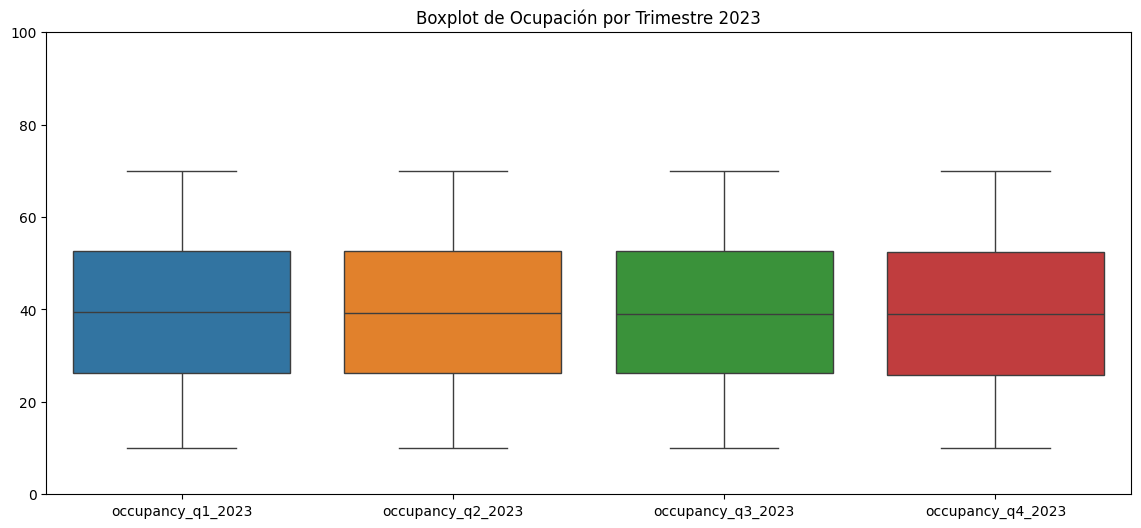

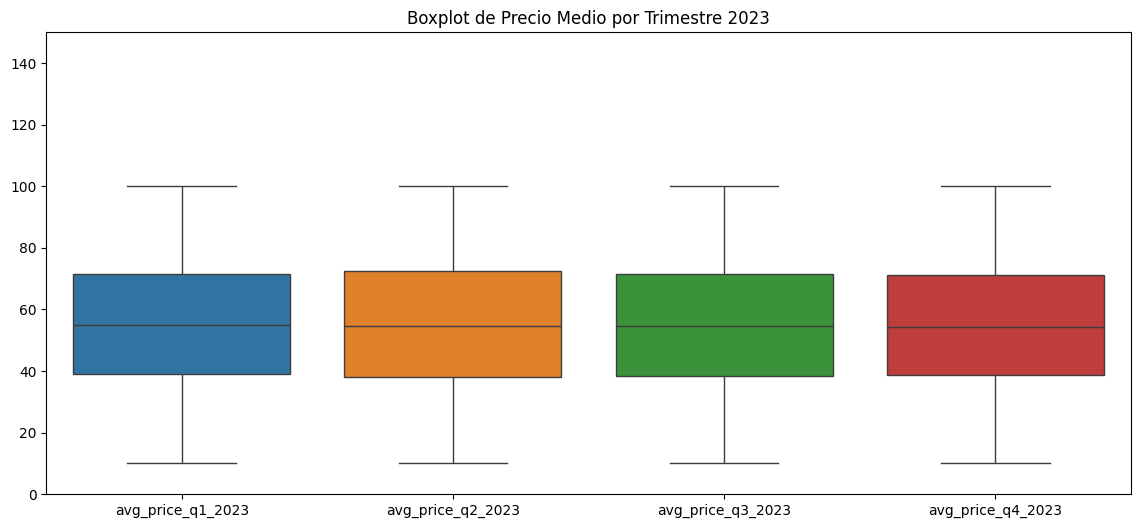

In [25]:
# Boxplots para identificar outliers (por trimestre)

# Ocupación 
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['occupancy_q1_2023', 'occupancy_q2_2023', 'occupancy_q3_2023', 'occupancy_q4_2023']], whis=1.5)
plt.ylim(0, 100)  
plt.title('Boxplot de Ocupación por Trimestre 2023')
plt.show()

# Precio medio 
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['avg_price_q1_2023', 'avg_price_q2_2023', 'avg_price_q3_2023', 'avg_price_q4_2023']], whis=1.5)
plt.ylim(0, 150)  
plt.title('Boxplot de Precio Medio por Trimestre 2023')
plt.show()

No hay valores atípicos que puedan ser errores o datos anómalos.

### Distribución

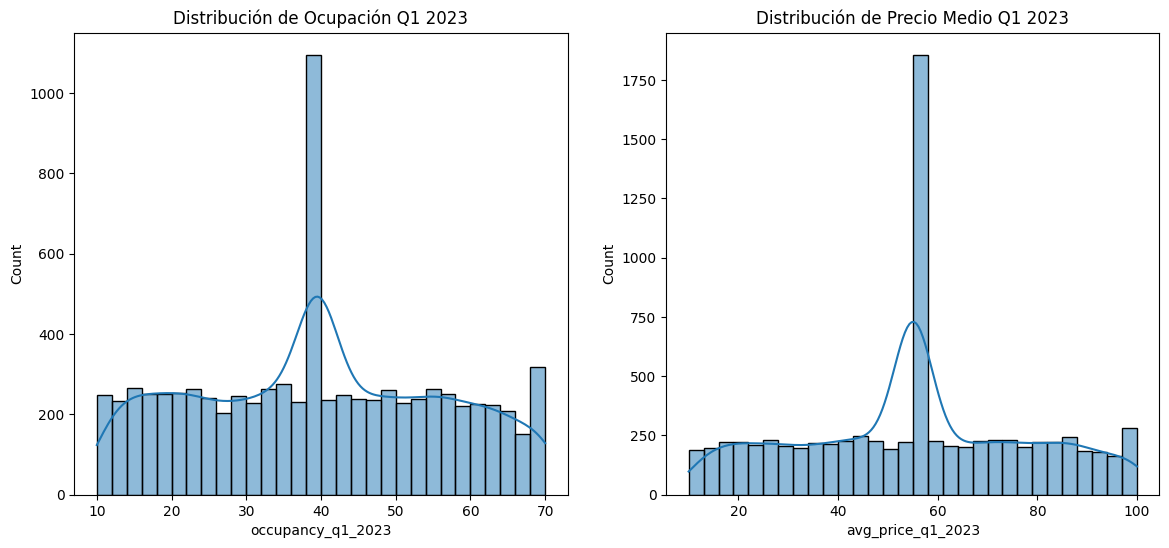

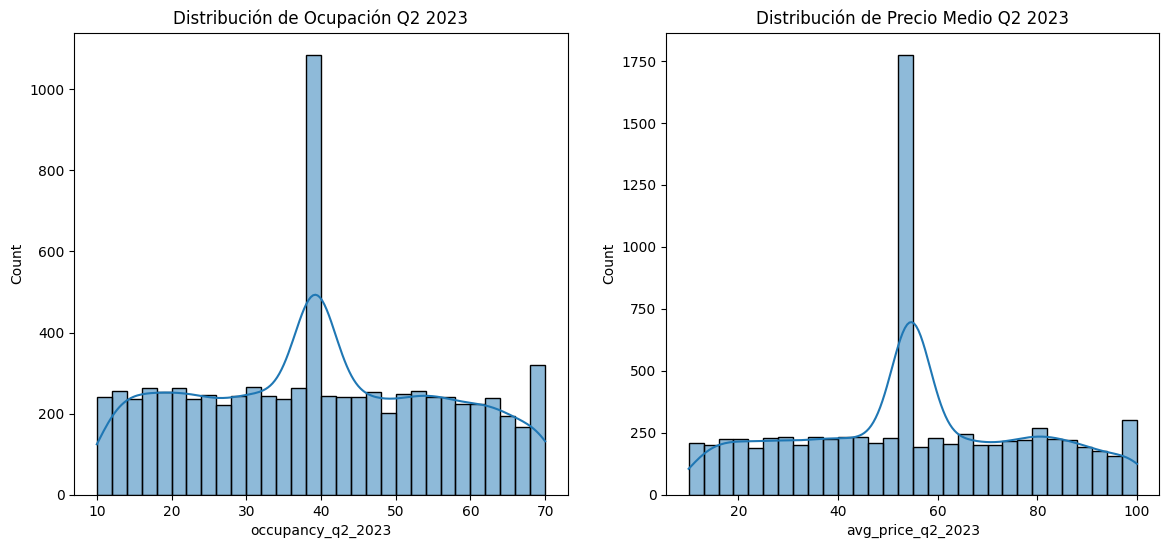

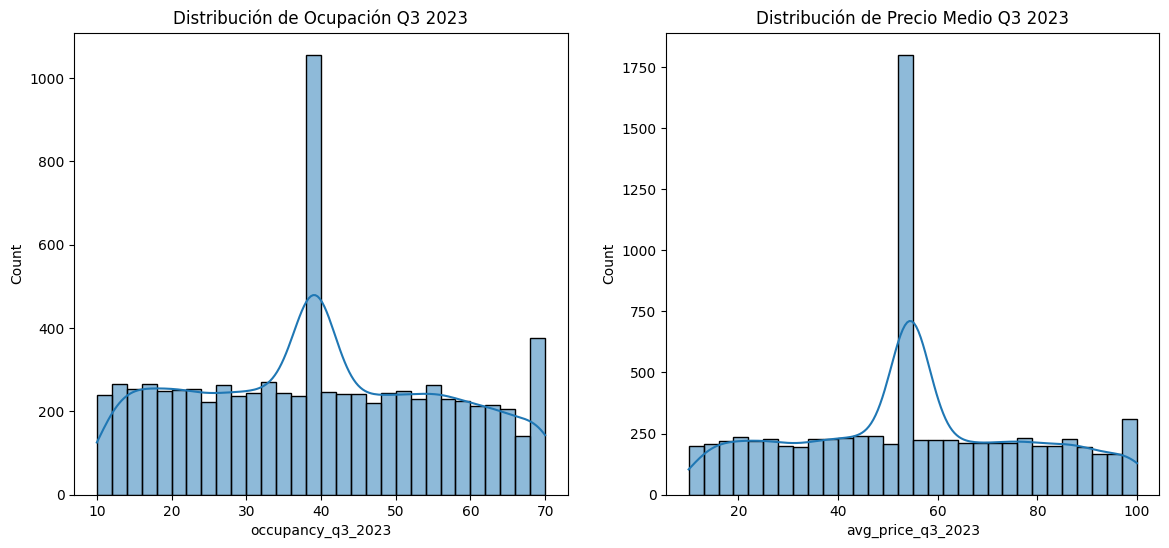

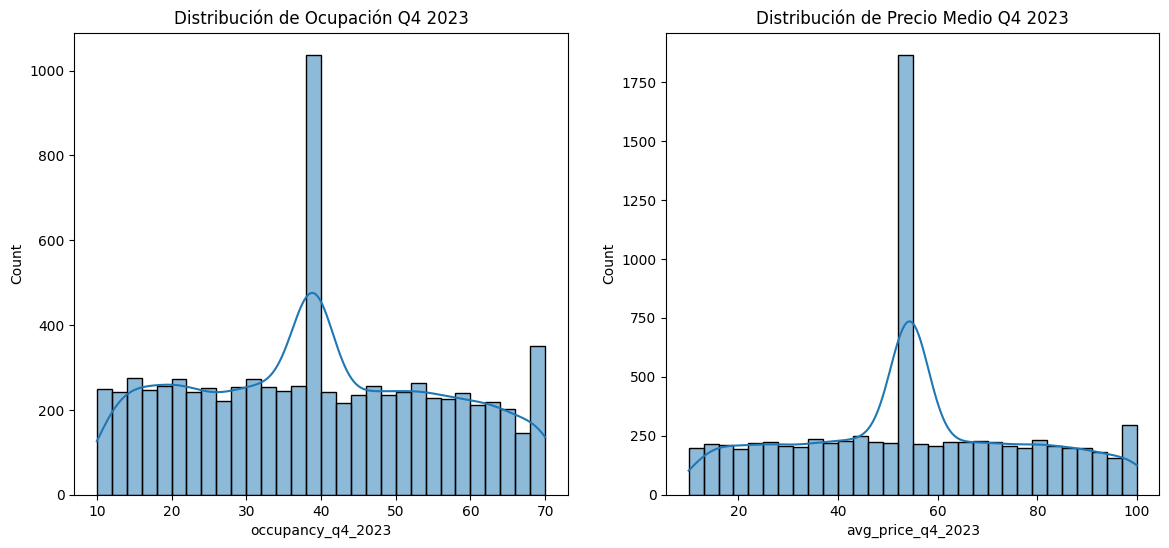

In [26]:
# Histogramas para distribución de ocupación y precio medio (por trimestre)
for i in range(1, 5):
    occupancy_col = f'occupancy_q{i}_2023'
    avgprice_col = f'avg_price_q{i}_2023'
    
    plt.figure(figsize=(14, 6))
    
    # Ocupación
    plt.subplot(1, 2, 1)
    sns.histplot(df[occupancy_col], kde=True, bins=30)
    plt.title(f'Distribución de Ocupación Q{i} 2023')
    
    # Precio medio
    plt.subplot(1, 2, 2)
    sns.histplot(df[avgprice_col], kde=True, bins=30)
    plt.title(f'Distribución de Precio Medio Q{i} 2023')
    
    plt.show()

- Distribuciones un poco sesgadas hacia la derecha (más cantidad de valores bajos que altos).

- Concentración de datos alrededor de una ocupación del 40% y precios medios que rondan los 50€.

- Existen picos claros en las distribuciones de ocupación que podrían representar patrones estacionales o eventos. 

- La presencia de valores extremos en los precios, especialmente en los valores más altos, indica una diversidad en las estrategias de precios entre los establecimientos. 

Es importante considerar la variabilidad anual y la diferenciación en las ofertas de precios de los restaurantes para entender su rendimiento.

### Correlación

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_12910/2216749245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


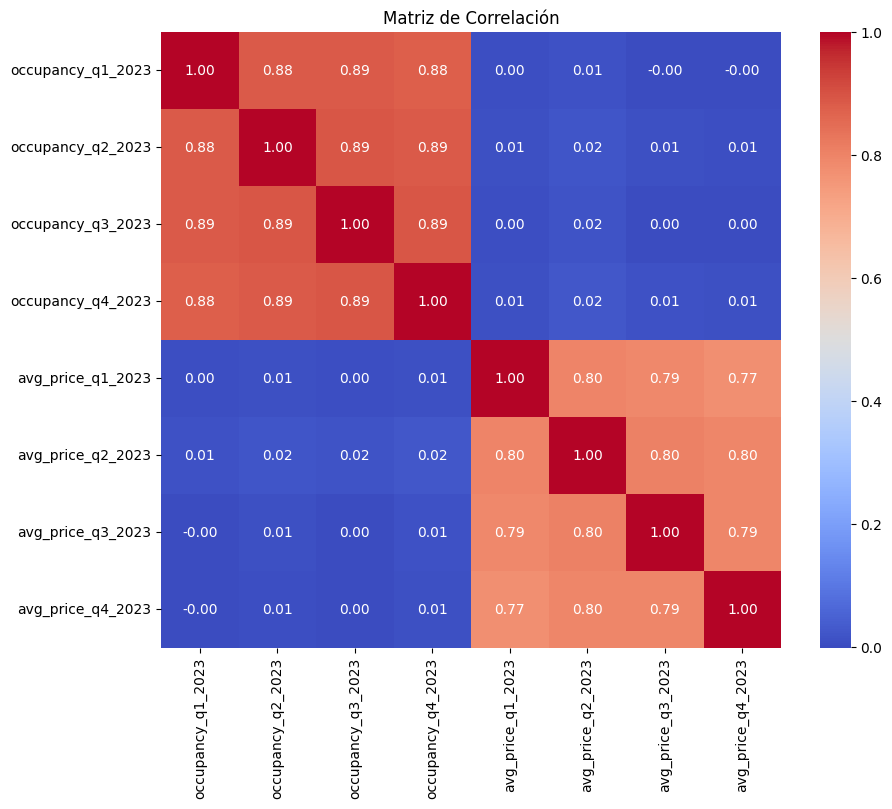

In [27]:
# Calcular la correlación entre todas las variables
correlation_matrix = df.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- Las ocupaciones por trimestre tienen una alta correlación entre sí. Si un restaurante tiene una alta ocupación en un trimestre es probable que la mantenga en los demás. 

- La correlación entre ocupación y precio medio por trimestre es muy baja (casi no la hay). No hay una relación directa entre lo lleno que está un restaurante y su precio medio. 

- Esto podría significar que los restaurantes no ajustan sus precios basandose en su ocupación.

#### Gráfico Kernel

Aunque según lo que se ve en el heatmap no haría falta explorar más a fondo la relación entre ocupación y precio medio, hago un análisis adicional por si se revelan patrones no lineales.

(No he puesto un gráfico de dispersión (scatter plot) porque no se ve bien ningún patrón.)

In [28]:
# Defino las columnas numéricas (para no tener que reescribirlas cada vez)
columnas_occupancy = ['occupancy_q1_2023', 'occupancy_q2_2023', 'occupancy_q3_2023', 'occupancy_q4_2023']
columnas_avg_price = ['avg_price_q1_2023', 'avg_price_q2_2023', 'avg_price_q3_2023', 'avg_price_q4_2023']

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_12910/2709731319.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


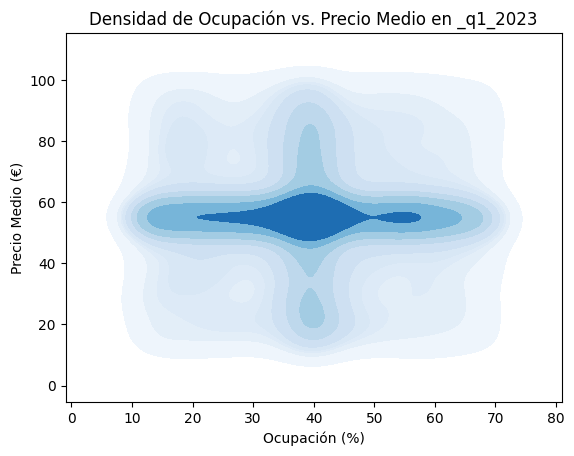

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_12910/2709731319.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


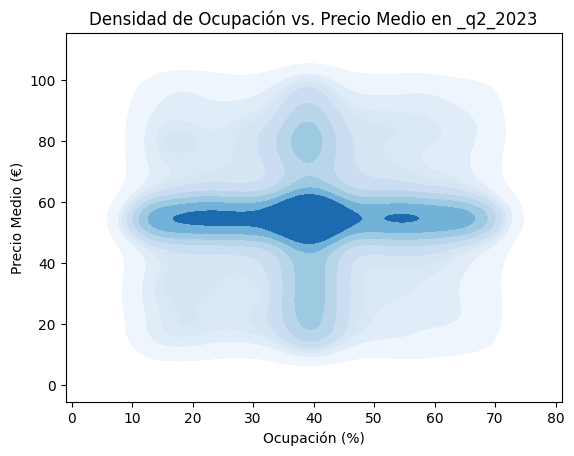

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_12910/2709731319.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


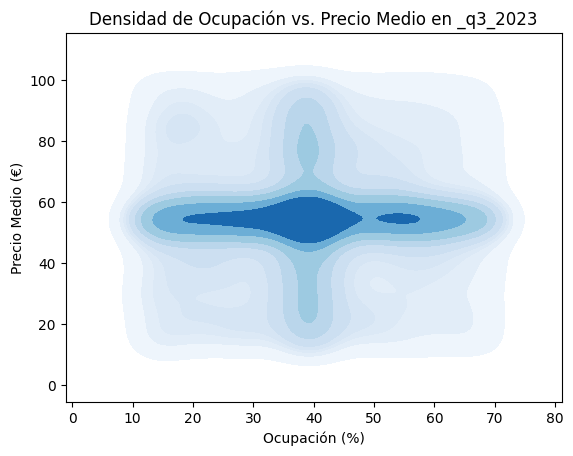

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_12910/2709731319.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


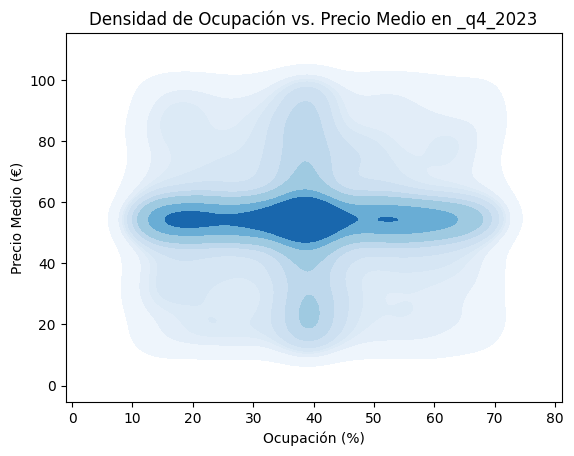

In [29]:
for i in range(4):
    sns.kdeplot(
        x=df[columnas_occupancy[i]], 
        y=df[columnas_avg_price[i]],
        cmap='Blues', 
        shade=True, 
        thresh=0.05  
    )
    plt.title(f'Densidad de Ocupación vs. Precio Medio en {columnas_occupancy[i][-8:]}')
    plt.xlabel('Ocupación (%)')
    plt.ylabel('Precio Medio (€)')
    plt.show()

- Hay concentración de restaurantes con ocupación del 20-60% y precios entre 20-80€, los rangos moderados son los más comunes. 

- Areas densas en torno al 30-40% de ocupación y 50€ de precio medio (combinación habitual).

- Menos dispersión de datos fuera de estas zonas. Los extremos son menos frecuentes. 

- Tampoco se ve una relación directa entre ocupación y precio. 

- Distribución similar a lo largo de los trimestres. La dinámica ocupación-precio se mantiene estable durante el año.

### Tendencia de la ocupación y del precio medio a lo largo del año

Para ver cambios o patrones (tendencias estacionales, etc.). 

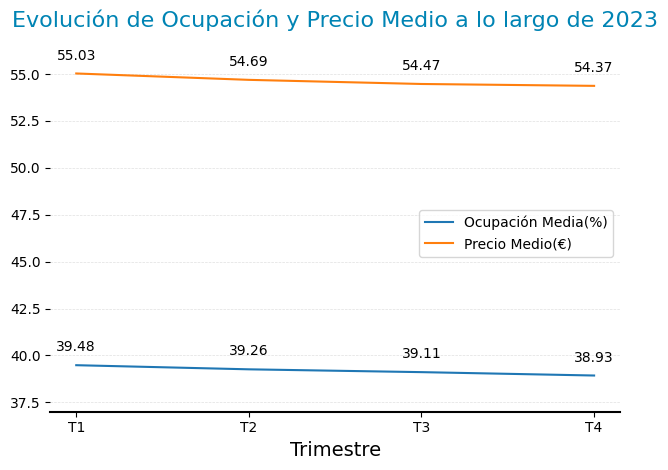

In [30]:
# Medianas
occupancy_median = df[columnas_occupancy].median()
avg_price_median = df[columnas_avg_price].median()

# Tendencia 
plt.plot(['T1', 'T2', 'T3', 'T4'], occupancy_median.values, label='Ocupación Media(%)')
plt.plot(['T1', 'T2', 'T3', 'T4'], avg_price_median.values, label='Precio Medio(€)')
plt.legend()

# Etiquetas de mediana
for i, txt in enumerate(occupancy_median.values):
    plt.annotate(f'{txt:.2f}', (f'T{i+1}', occupancy_median[i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, txt in enumerate(avg_price_median.values):
    plt.annotate(f'{txt:.2f}', (f'T{i+1}', avg_price_median[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Estilo del gráfico
plt.title('Evolución de Ocupación y Precio Medio a lo largo de 2023', fontsize=16, color='#0084B4', pad=20)  
plt.xlabel('Trimestre', fontsize=14)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['bottom'].set_linestyle('-') 
plt.gca().spines['bottom'].set_linewidth(1.5) 
plt.gca().spines['left'].set_visible(False)  
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)  
plt.ylim(37, 56)  
plt.tight_layout()
plt.show()

- Ocupación media estable a lo largo del 2023 (sin fluctuaciones significativas). 
- Tampoco hay cambios notables en el precio medio durante el 2023.
- No hay una tendencia marcada = no varian precios ni estrategias de ocupación a lo largo del año. 
- Patrón estable sin influencias estacionales marcadas.

### Resumen Estadístico

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
occupancy_q1_2023,8086.0,39.577215,16.375809,10.0,26.1625,39.48,52.5675,70.0
occupancy_q2_2023,8086.0,39.550279,16.429493,10.0,26.2025,39.26,52.6200,70.0
occupancy_q3_2023,8086.0,39.496624,16.546882,10.0,26.1600,39.11,52.6675,70.0
occupancy_q4_2023,8086.0,39.372091,16.515458,10.0,25.9100,38.93,52.5050,70.0
avg_price_q1_2023,8086.0,55.157988,23.057250,10.0,38.9225,55.03,71.5375,100.0
avg_price_q2_2023,8086.0,55.017950,23.315220,10.0,37.9625,54.69,72.3875,100.0
avg_price_q3_2023,8086.0,54.792786,23.266505,10.0,38.3200,54.47,71.5400,100.0
avg_price_q4_2023,8086.0,54.822117,23.037188,10.0,38.7775,54.37,71.0975,100.0


## 5. Ingeniería de Características

En esta parte creo nuevas variables que pueden ser útiles como:

**1. Crecimiento Total de la Ocupación a lo largo del año:** cambio relativo en la ocupación desde el primer hasta el último trimestre para ver tendencia de mejora o deterioro en la capacidad del restaurante para atraer clientes.

**2. Crecimiento Total del Precio Medio:** un aumento puede indicar que el restaurante ha subido sus precios o ha atraído a un público que gasta más, mientras que una disminución podría indicar promociones o descuentos.

**3. Variación de la Ocupación a lo largo del año:** si es alta indica que el negocio es menos estable y eso puede ser un riesgo o una oportunidad dependiendo del contexto.

**4. Variación del Precio Medio:** lo mismo que con la ocupación.

**5. Medianas de Ocupación y Precio Medio:** elijo mediana porque no está sesgada por los valores extremos.

**6. Valor absoluto:** diferencia en ocupación y precio medio entre el primer y último trimestre (con su respectiva variación en % también).

In [32]:
# Importo librería
import numpy as np

# Crecimiento total
df['total_occupancy_growth_2023'] = (df['occupancy_q4_2023'] - df['occupancy_q1_2023']) / df['occupancy_q1_2023']
df['total_avg_price_growth_2023'] = (df['avg_price_q4_2023'] - df['avg_price_q1_2023']) / df['avg_price_q1_2023']

# Variación
df['occupancy_volatility_2023'] = df[columnas_occupancy].std(axis=1)
df['avg_price_volatility_2023'] = df[columnas_avg_price].std(axis=1)

# Medianas
df['occupancy_median_2023'] = df[columnas_occupancy].median(axis=1)
df['avg_price_median_2023'] = df[columnas_avg_price].median(axis=1)

# Valor absoluto
df['occupancy_diff_q1_q4'] = df['occupancy_q4_2023'] - df['occupancy_q1_2023']
df['avg_price_diff_q1_q4'] = df['avg_price_q4_2023'] - df['avg_price_q1_2023']

# Evitar errores
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Redondear a dos decimales
df = df.round(2)

In [33]:
df.head()

,id,name,occupancy_q1_2023,occupancy_q2_2023,occupancy_q3_2023,occupancy_q4_2023,avg_price_q1_2023,avg_price_q2_2023,avg_price_q3_2023,avg_price_q4_2023,total_occupancy_growth_2023,total_avg_price_growth_2023,occupancy_volatility_2023,avg_price_volatility_2023,occupancy_median_2023,avg_price_median_2023,occupancy_diff_q1_q4,avg_price_diff_q1_q4
0,123,Taberna El Palomo,36.02,32.92,36.07,32.67,27.53,26.31,27.30,25.01,-0.09,-0.09,1.88,1.15,34.47,26.80,-3.35,-2.52
1,147,Columnas,39.48,59.16,58.99,55.28,73.36,54.69,80.47,72.67,0.40,-0.01,9.34,10.99,57.14,73.02,15.80,-0.69
2,173,Café de Indias,38.55,39.26,40.24,39.06,37.58,40.07,41.41,38.89,0.01,0.03,0.71,1.64,39.16,39.48,0.51,1.31
3,176,Horno San Buenaventura Asunción,63.97,62.30,57.83,55.61,55.03,54.69,13.61,13.51,-0.13,-0.75,3.87,23.85,60.06,34.15,-8.36,-41.52
4,181,Pelayo Bar de Tapas,24.72,26.41,28.00,25.94,53.18,49.29,48.16,54.37,0.05,0.02,1.36,2.99,26.18,51.24,1.22,1.19


In [34]:
# Descripción estadística de las nuevas métricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
occupancy_q1_2023,8086.0,39.577215,16.375809,10.00,26.1625,39.48,52.5675,70.00
occupancy_q2_2023,8086.0,39.550279,16.429493,10.00,26.2025,39.26,52.6200,70.00
occupancy_q3_2023,8086.0,39.496624,16.546882,10.00,26.1600,39.11,52.6675,70.00
occupancy_q4_2023,8086.0,39.372091,16.515458,10.00,25.9100,38.93,52.5050,70.00
avg_price_q1_2023,8086.0,55.157988,23.057250,10.00,38.9225,55.03,71.5375,100.00
avg_price_q2_2023,8086.0,55.017950,23.315220,10.00,37.9625,54.69,72.3875,100.00
avg_price_q3_2023,8086.0,54.792786,23.266505,10.00,38.3200,54.47,71.5400,100.00
avg_price_q4_2023,8086.0,54.822117,23.037188,10.00,38.7775,54.37,71.0975,100.00
total_occupancy_growth_2023,8086.0,0.022862,0.286593,-0.75,-0.0800,-0.01,0.0700,2.89
total_avg_price_growth_2023,8086.0,0.062126,0.482551,-0.82,-0.0900,-0.01,0.0900,4.44


**Resumen de lo visto hasta ahora:**

- En 2023 la ocupación y los precios medios de los restaurantes tienen una tendencia estable a lo largo del año, con pequeñas variaciones trimestrales. 
- Aunque la ocupación y los precios medios disminuyen un poco hacia el final del año, el crecimiento total en ambos es positivo (resistencia en el mercado).
- La variación en los precios es más notable (diferentes niveles de adaptabilidad entre los restaurantes a las condiciones del mercado). 
- A pesar de algunas fluctuaciones, en general el rendimiento de los restaurantes se mantuvo estable. Demanda constante y capacidad para ajustarse a las condiciones del mercado.

- Con el valor absoluto se puede ver la amplitud de los cambios en la ocupación y los precios medios entre el primer y el último trimestre del año. Para la diferencia en la ocupación, el rango va desde una disminución de 31% hasta un aumento de 30%. Mientras tanto, en la diferencia de precios medios, el rango es más amplio, con una disminución mínima de 45.63€ y un aumento máximo de 44.97€. Esto puede mostrar casos concretos de restaurantes a los que prestar atención ya que tienen o fuertes caídas o aumentos significativos en la ocupación y los precios.

## 6. Métricas de Rendimiento

**- Buen rendimiento:** crecimiento constante en la ocupación y un aumento en el precio medio sin una alta variación, demanda estable y capacidad para aumentar precios.

**- Mal rendimiento:** disminución en la ocupación o en el precio medio a lo largo del año, o una alta variación que indique incertidumbre o inestabilidad en el negocio.

### Rendimiento por Categorías de Precios

#### Pivot table precio medio por rango

In [35]:
# Definir rangos de precios en menos de 20€, entre 20 y 50, y mayores de 50€
bins = [0, 20, 50, np.inf]
labels = ['<20€', '20-50€', '>50€']
df['price'] = pd.cut(df['avg_price_median_2023'], bins=bins, labels=labels, include_lowest=True)

# Pivot table  
pivot_price_by_avg_price_median = df.pivot_table(
    values='avg_price_median_2023', 
    index='price',  
    aggfunc=np.median  
)

pivot_price_by_avg_price_median.round(2)

,avg_price_median_2023
price,
<20€,15.40
20-50€,37.02
>50€,69.59


#### Pivot table de ocupación media, variación, crecimiento total y diferencias absolutas por precio

In [36]:
# Rango 
bins = [0, 20, 50, np.inf]
labels = ['<20€', '20-50€', '>50€']
df['price'] = pd.cut(df['avg_price_median_2023'], bins=bins, labels=labels, include_lowest=True)

# Pivot table
pivot_price = df.pivot_table(
    values=[
        'occupancy_median_2023', 
        'occupancy_volatility_2023', 
        'total_occupancy_growth_2023',
        'occupancy_diff_q1_q4'  
    ],
    index='price',
    aggfunc={
        'occupancy_median_2023': np.mean,
        'occupancy_volatility_2023': np.mean,
        'total_occupancy_growth_2023': np.mean,
        'occupancy_diff_q1_q4': np.mean  
    }
)

pivot_price.round(2)

,occupancy_diff_q1_q4,occupancy_median_2023,occupancy_volatility_2023,total_occupancy_growth_2023
price,,,,
<20€,-0.80,38.89,4.08,0.01
20-50€,-0.30,39.49,3.95,0.02
>50€,-0.06,39.43,3.92,0.03


- Los restaurantes con precios inferiores a 20€ muestran una disminución en la ocupación a lo largo del año, con un cambio del -0.80%, aunque su crecimiento total es mínimo. 
- Los de precios medios (20-50€) y los de precios altos (más de 50€) tienen una menor disminución en la ocupación y un crecimiento ligeramente mayor. 
- Variaciones similares y estables de ocupación a lo largo del año en todos los rangos. 
- En general, los restaurantes más económicos podrían ser un poco más susceptibles a cambios en la ocupación que aquellos con precios más altos (que parecen mantener mejor su clientela).

#### Pivot table de la mediana de ocupación por trimestre y por rango de precios

In [37]:
# Rango
bins = [0, 20, 50, np.inf]
labels = ['<20€', '20-50€', '>50€']
df['price'] = pd.cut(df['avg_price_median_2023'], bins=bins, labels=labels, include_lowest=True)

# Pivot table 
pivot_occupancy_median_by_quarter = df.pivot_table(
    values=[
        'occupancy_q1_2023', 
        'occupancy_q2_2023', 
        'occupancy_q3_2023', 
        'occupancy_q4_2023'
    ],
    index='price',
    aggfunc={
        'occupancy_q1_2023': np.mean,
        'occupancy_q2_2023': np.mean,
        'occupancy_q3_2023': np.mean,
        'occupancy_q4_2023': np.mean  
    }
)

pivot_occupancy_median_by_quarter.round(2)

,occupancy_q1_2023,occupancy_q2_2023,occupancy_q3_2023,occupancy_q4_2023
price,,,,
<20€,39.49,38.85,39.03,38.69
20-50€,39.64,39.59,39.60,39.34
>50€,39.55,39.63,39.51,39.49


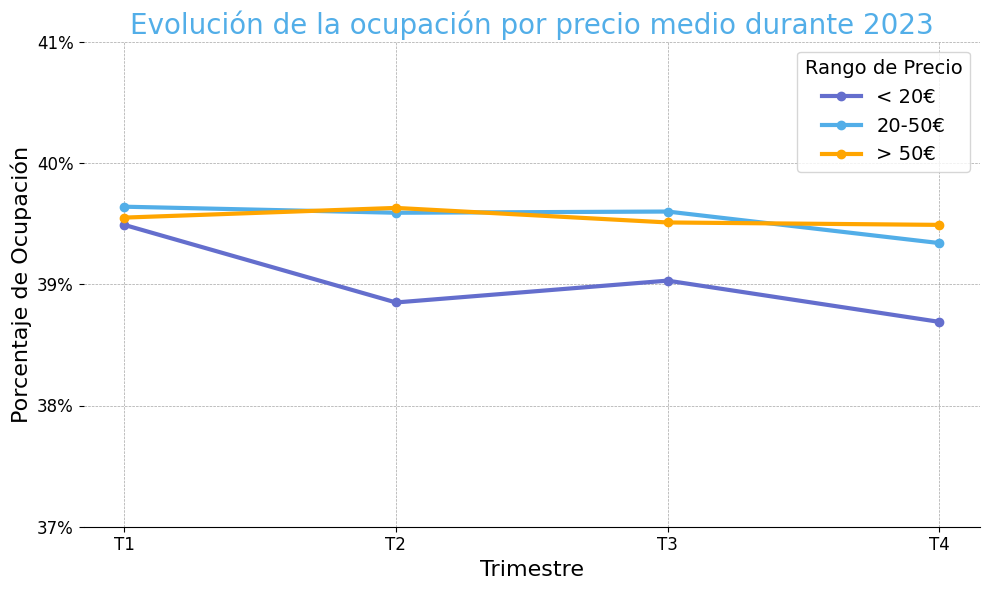

In [38]:
from matplotlib.ticker import FuncFormatter

# Datos del pivot table
occupancy_data = {
    'occupancy_q1_2023': [39.49, 39.64, 39.55],
    'occupancy_q2_2023': [38.85, 39.59, 39.63],
    'occupancy_q3_2023': [39.03, 39.60, 39.51],
    'occupancy_q4_2023': [38.69, 39.34, 39.49]
}
price_ranges = ['< 20€', '20-50€', '> 50€']
pivot_df = pd.DataFrame(occupancy_data, index=price_ranges)

# Gráfica
colors = ['#646ECD', '#52AEE8', 'orange']
plt.figure(figsize=(10,6))
plt.ylim(37, 41)

# Formato para las etiquetas del eje Y
def y_format(x, pos):
    return f'{x:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_format))
plt.yticks(np.arange(37, 42, 1), fontsize=12)  
plt.xticks(fontsize=12) 
for i, price_range in enumerate(pivot_df.index):
    plt.plot(['T1', 'T2', 'T3', 'T4'], pivot_df.loc[price_range, :], marker='o', color=colors[i], label=price_range, linewidth=3)
plt.title('Evolución de la ocupación por precio medio durante 2023', fontsize=20, color='#52AEE8')
plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('Porcentaje de Ocupación', fontsize=16)
plt.legend(title='Rango de Precio', fontsize=14, title_fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

La ocupación de los restaurantes de precios más bajos disminuye ligeramente a lo largo del año, mientras que los de precio medio y alto mantienen una ocupación más estable a lo largo del año.

In [39]:
# Revisar df original
df.head()

,id,name,occupancy_q1_2023,occupancy_q2_2023,occupancy_q3_2023,occupancy_q4_2023,avg_price_q1_2023,avg_price_q2_2023,avg_price_q3_2023,avg_price_q4_2023,total_occupancy_growth_2023,total_avg_price_growth_2023,occupancy_volatility_2023,avg_price_volatility_2023,occupancy_median_2023,avg_price_median_2023,occupancy_diff_q1_q4,avg_price_diff_q1_q4,price
0,123,Taberna El Palomo,36.02,32.92,36.07,32.67,27.53,26.31,27.30,25.01,-0.09,-0.09,1.88,1.15,34.47,26.80,-3.35,-2.52,20-50€
1,147,Columnas,39.48,59.16,58.99,55.28,73.36,54.69,80.47,72.67,0.40,-0.01,9.34,10.99,57.14,73.02,15.80,-0.69,>50€
2,173,Café de Indias,38.55,39.26,40.24,39.06,37.58,40.07,41.41,38.89,0.01,0.03,0.71,1.64,39.16,39.48,0.51,1.31,20-50€
3,176,Horno San Buenaventura Asunción,63.97,62.30,57.83,55.61,55.03,54.69,13.61,13.51,-0.13,-0.75,3.87,23.85,60.06,34.15,-8.36,-41.52,20-50€
4,181,Pelayo Bar de Tapas,24.72,26.41,28.00,25.94,53.18,49.29,48.16,54.37,0.05,0.02,1.36,2.99,26.18,51.24,1.22,1.19,>50€


### Rendimiento por Rangos de Ocupación

#### Pivot table de precio medio, variación y crecimiento total del precio por ocupación

In [40]:
# Rango de ocupación
bins_occupancy = [0, 30, 70, np.inf]
labels_occupancy = ['<30%', '30-70%', '>70%']
df['occupancy'] = pd.cut(df['occupancy_median_2023'], bins=bins_occupancy, labels=labels_occupancy, include_lowest=True)

# Pivot table 
pivot_occupancy = df.pivot_table(
    values=['avg_price_median_2023', 'avg_price_volatility_2023', 'total_avg_price_growth_2023', 'avg_price_diff_q1_q4'],
    index='occupancy',
    aggfunc={
        'avg_price_median_2023': np.mean,
        'avg_price_volatility_2023': np.mean,
        'total_avg_price_growth_2023': np.mean,
        'avg_price_diff_q1_q4': np.mean  
    }
)

pivot_occupancy.round(2)

,avg_price_diff_q1_q4,avg_price_median_2023,avg_price_volatility_2023,total_avg_price_growth_2023
occupancy,,,,
<30%,-0.32,54.52,7.96,0.07
30-70%,-0.34,54.94,8.03,0.06


- Los restaurantes con una ocupación inferior al 30% y entre el 30% y el 70% disminuyen un poco el precio medio a lo largo del año.
- Hay fluctuación en sus precios aunque mantienen un crecimiento positivo.

In [41]:
# Pivot table para la mediana de ocupación total para cada rango de ocupación
pivot_occupancy_total_median = df.pivot_table(
    values='occupancy_median_2023', 
    index='occupancy',
    aggfunc='median'  
)

pivot_occupancy_total_median.round(2)

,occupancy_median_2023
occupancy,
<30%,20.10
30-70%,48.14


En los datos de 2023 no hay restaurantes con ocupación superior al 70%.

#### Mediana del precio medio por trimestre para cada rango de ocupación

In [42]:
# Mediana del precio medio por trimestre para cada categoría de ocupación
pivot_occupancy_avg_price = df.pivot_table(
    values=['avg_price_q1_2023', 'avg_price_q2_2023', 'avg_price_q3_2023', 'avg_price_q4_2023'],
    index='occupancy',
    aggfunc={
        'avg_price_q1_2023': np.mean,
        'avg_price_q2_2023': np.mean,
        'avg_price_q3_2023': np.mean,
        'avg_price_q4_2023': np.mean  
    }
)

pivot_occupancy_avg_price.round(2)

,avg_price_q1_2023,avg_price_q2_2023,avg_price_q3_2023,avg_price_q4_2023
occupancy,,,,
<30%,54.99,54.56,54.64,54.67
30-70%,55.24,55.25,54.87,54.90


Los precios medios de los restaurantes tanto en rangos de ocupación bajos como medios son bastante estables durante el año, con una tendencia a disminuir ligeramente hacia el final del año.

### Resumen de Métricas Clave para 2023

In [43]:
# Métricas
metrics = {
    'median_2023': [df['occupancy_median_2023'].median(), df['avg_price_median_2023'].median()],
    'growth_2023 (%)': [df['total_occupancy_growth_2023'].median(), df['total_avg_price_growth_2023'].median()],
    'volatility_2023 (%)': [df['occupancy_volatility_2023'].median(), df['avg_price_volatility_2023'].median()],
    'absolute_value_2023': [df['occupancy_diff_q1_q4'].median(), df['avg_price_diff_q1_q4'].median()]
}

# Convertir en df
pivot_df_2 = pd.DataFrame(metrics, index=['occupancy (%)', 'avg_price (€)'])
pivot_df_2

,median_2023,growth_2023 (%),volatility_2023 (%),absolute_value_2023
occupancy (%),39.18,-0.01,2.35,-0.26
avg_price (€),54.58,-0.01,5.11,-0.50


**Ocupación:**
- Ocupación del 39% estable durante 2023. 
- A lo largo del año ligera disminución del 0.26%.
- Variacón baja (2.35%) de un trimestre a otro.

**Precio:**
- Crecimiento estable (cambio mínimo de -0.01%).
- Más variable (5.11%) a lo largo del año. 
- Disminución de 0.50€ en el precio medio entre final e incio de año.

### Comparación de Medianas y Variación Trimestral (Q1-Q4) para 2023

In [44]:
# Medianas Q1 y Q4
median_q1_occupancy = df['occupancy_q1_2023'].median()
median_q4_occupancy = df['occupancy_q4_2023'].median()

median_q1_avg_price = df['avg_price_q1_2023'].median()
median_q4_avg_price = df['avg_price_q4_2023'].median()

# Variación de Q1 a Q4
variation_occupancy_q1_q4_percent = ((median_q4_occupancy - median_q1_occupancy) / median_q1_occupancy) * 100
variation_avg_price_q1_q4_percent = ((median_q4_avg_price - median_q1_avg_price) / median_q1_avg_price) * 100

# Pivot table
metrics = {
    'median_q1': [median_q1_occupancy, median_q1_avg_price],
    'median_q4': [median_q4_occupancy, median_q4_avg_price],
    'variation_q1_q4 (%)': [variation_occupancy_q1_q4_percent, variation_avg_price_q1_q4_percent]
}

pivot_df_q = pd.DataFrame(metrics, index=['occupancy (%)', 'avg_price (€)'])
pivot_df_q.round(2)

,median_q1,median_q4,variation_q1_q4 (%)
occupancy (%),39.48,38.93,-1.39
avg_price (€),55.03,54.37,-1.20


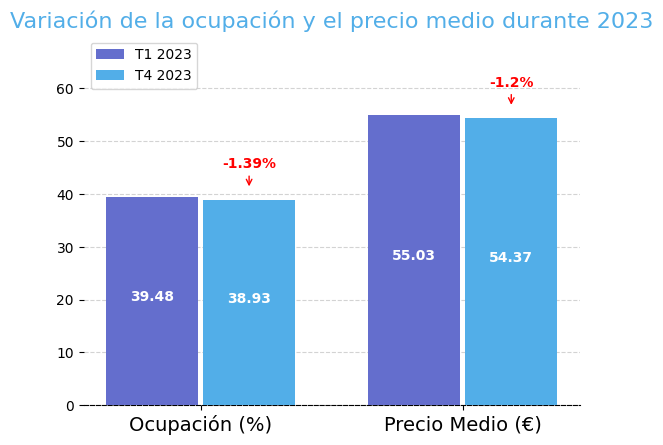

In [45]:
# Datos del pivot table
categories = ['Ocupación (%)', 'Precio Medio (€)']
median_q1_values = [39.48, 55.03]  # Mediana para Q1
median_q4_values = [38.93, 54.37]  # Mediana para Q4
variation_values = [-1.39, -1.20]  # Variación porcentual de Q1 a Q4

# Gráfica
custom_blue = '#646ECD'  
custom_orange = '#52AEE8'  
bar_width = 0.35
bar_positions = np.arange(len(categories))  
spacing = 0.01
fig, ax = plt.subplots()
bar_positions_q1 = bar_positions - (bar_width/2 + spacing)  
bar_positions_q4 = bar_positions + (bar_width/2 + spacing)  
bars_q1 = ax.bar(bar_positions_q1, median_q1_values, bar_width, label='T1 2023', color=custom_blue, zorder=3)
bars_q4 = ax.bar(bar_positions_q4, median_q4_values, bar_width, label='T4 2023', color=custom_orange, zorder=3)

# Etiquetas de valor dentro de las barras y variación con flechas
for i, (q1, q4, var) in enumerate(zip(median_q1_values, median_q4_values, variation_values)):
    ax.text(bar_positions_q1[i], q1 / 2, f'{q1}', ha='center', color='white', fontweight='bold', zorder=4)
    ax.text(bar_positions_q4[i], q4 / 2, f'{q4}', ha='center', color='white', fontweight='bold', zorder=4)
    # Flechas para la variación
    ax.annotate('', xy=(bar_positions_q4[i], q4 + 2), xytext=(bar_positions_q4[i], q4 + 5),
                arrowprops=dict(arrowstyle="->", color='red'), zorder=5)
    ax.text(bar_positions_q4[i], q4 + 6, f'{var}%', ha='center', color='red', fontweight='bold', zorder=4)

# Etiquetas y títulos
ax.set_title('Variación de la ocupación y el precio medio durante 2023', fontsize=16, color='#52AEE8')
ax.set_xticks(bar_positions)  
ax.set_xticklabels(categories, fontsize=14)
ax.legend(loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linestyle('--')
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=2)  

ax.set_ylim([0, 70])
ax.set_yticks(np.arange(0, 70, 10))

plt.show()

Durante 2023, la ocupación en restaurantes disminuyó ligeramente de un 39,48% en Q1 a un 38,93% en Q4, disminución del 1,39%. Mientras que el precio medio presentó una caída del 1,20%, bajando de 55,03€ a 54,37€.

In [46]:
# Revisar df original
df.head()

,id,name,occupancy_q1_2023,occupancy_q2_2023,occupancy_q3_2023,occupancy_q4_2023,avg_price_q1_2023,avg_price_q2_2023,avg_price_q3_2023,avg_price_q4_2023,total_occupancy_growth_2023,total_avg_price_growth_2023,occupancy_volatility_2023,avg_price_volatility_2023,occupancy_median_2023,avg_price_median_2023,occupancy_diff_q1_q4,avg_price_diff_q1_q4,price,occupancy
0,123,Taberna El Palomo,36.02,32.92,36.07,32.67,27.53,26.31,27.30,25.01,-0.09,-0.09,1.88,1.15,34.47,26.80,-3.35,-2.52,20-50€,30-70%
1,147,Columnas,39.48,59.16,58.99,55.28,73.36,54.69,80.47,72.67,0.40,-0.01,9.34,10.99,57.14,73.02,15.80,-0.69,>50€,30-70%
2,173,Café de Indias,38.55,39.26,40.24,39.06,37.58,40.07,41.41,38.89,0.01,0.03,0.71,1.64,39.16,39.48,0.51,1.31,20-50€,30-70%
3,176,Horno San Buenaventura Asunción,63.97,62.30,57.83,55.61,55.03,54.69,13.61,13.51,-0.13,-0.75,3.87,23.85,60.06,34.15,-8.36,-41.52,20-50€,30-70%
4,181,Pelayo Bar de Tapas,24.72,26.41,28.00,25.94,53.18,49.29,48.16,54.37,0.05,0.02,1.36,2.99,26.18,51.24,1.22,1.19,>50€,<30%


In [47]:
df.shape

(8086, 20)

In [48]:
# Guardar en csv el df con las métricas
df.to_csv('df_metricas.csv', index=False)

## Insights Rendimiento Restaurantes en 2023

- En 2023, los restaurantes con precios más bajos han mantenido una ocupación estable, con una ligera caída hacia el final del año. 

- Por otro lado, los que tienen precios medios y altos han tenido un buen rendimiento, manteniendo una ocupación sólida y un ligero crecimiento en precios. 

- Todos han tenido una variación parecida, pero los restaurantes económicos pueden necesitar prestar más atención a la competencia y la fidelización de clientes. 

En resumen, los restaurantes con precios más altos se adaptaron mejor y tuvieron un rendimiento más sólido, mientras que los más económicos podrían beneficiarse de una mayor estabilidad en la ocupación y el precio.